In [1]:
from src.utils import read_yaml, extract_best_loss_from_event_file
from matplotlib import pyplot as plt
from typing import Tuple
import pandas as pd
import numpy as np
import os

In [2]:
def get_loss_and_params(dir: str) -> pd.DataFrame:
    all_loss_hyperparams = []
    for directory in sorted(os.listdir(dir)):
        loss_value = None
        parameter_dict = None
        if os.path.isdir(os.path.join(dir, directory)):
            for file in os.listdir(os.path.join(dir, directory)):
                if "events" in file.split("."):
                    file_path = os.path.join(dir, directory, file)
                    loss_value = extract_best_loss_from_event_file(file_path)
                elif file == "hparams.yaml":
                    file_path = os.path.join(dir, directory, file)
                    parameter_dict = read_yaml(file_path)
            if loss_value and parameter_dict:
                all_loss_hyperparams.append(
                    {
                        "directory": int(directory.split("_")[-1]),
                        **loss_value,
                        **parameter_dict,
                    }
                )
    return pd.DataFrame(all_loss_hyperparams)


def get_cumulative_sum(results: pd.DataFrame) -> Tuple[range, np.ndarray]:
    results = results.sort_values("directory")
    results["pass"] = (results["best_loss"] < 5e-6).astype(int)

    passes = results["pass"].to_numpy()
    sums = np.cumsum(passes)

    return range(1, len(passes) + 1), sums

In [3]:
path1 = "../autoregressor_backup_4/overfitting_K=1.5"

In [4]:
results1 = get_loss_and_params(path1)

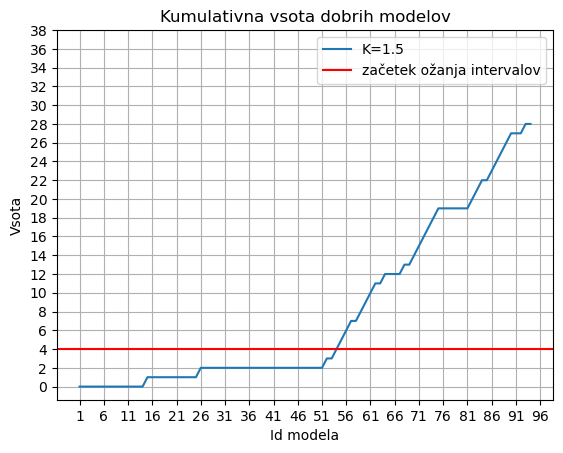

In [30]:
max_dir = results1["directory"].max()

xticks = range(1, max_dir + 4, 5)
yticks = range(0, 40, 2)

plt.plot(*get_cumulative_sum(results1), label="K=1.5")
plt.xlabel("Id modela")
plt.xticks(xticks, [str(i) for i in xticks])
plt.yticks(yticks, [str(i) for i in yticks])
plt.ylabel("Vsota")
plt.title("Kumulativna vsota dobrih modelov")
plt.grid(True)
plt.axhline(4, color="red", label="začetek ožanja intervalov")
plt.legend()
plt.savefig("figures/num_good_examples.pdf")
plt.show()